In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.tools.eval_measures as ste
import sklearn.linear_model as slm
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_seq_items', 500)

### 1.1-1.2

In [2]:
#input election file
election = pd.read_csv('us-elections-2016.csv.bz2', sep = '\t')

#input county file
county = pd.read_csv('county-data.csv.bz2')

#adds the right number of zeros to coincide with FIPS format
county['COUNTY'] = county['COUNTY'].astype(str).apply(lambda x: x.zfill(3))

#concatenates the two columns
county['fips_code'] = (county['STATE'].astype(str) + county['COUNTY'].astype(str)).astype(int)

#The election data includes no information about the Alaska. So joining by the election will be sufficient
#There IS election data for District of Columbia
joined = pd.merge(county, election, on = 'fips_code', how = 'right')


### 1.3

In [3]:
joined_2016 = joined[['SUMLEV',
                      'REGION', 
                      'DIVISION', 
                      'STATE', 
                      'COUNTY',
                      'STNAME', 
                      'CTYNAME',
                      'POPESTIMATE2016',
                      'NPOPCHG_2016',
                      'BIRTHS2016',
                      'DEATHS2016',
                      'NATURALINC2016',
                      'INTERNATIONALMIG2016',
                      'DOMESTICMIG2016',
                      'NETMIG2016',
                      'RESIDUAL2016',
                      'GQESTIMATES2016',
                      'RBIRTH2016', 
                      'RDEATH2016',
                      'RNATURALINC2016',
                      'RINTERNATIONALMIG2016',
                      'RDOMESTICMIG2016', 
                      'RNETMIG2016',
                      'fips_code',
                      'county', 
                      'total_2016',
                      'dem_2016', 
                      'gop_2016', 
                      'oth_2016', 
                      'stateFips',
                      'state'
                    ]]

In [4]:
joined_2016['perc_dem'] =  joined_2016.loc[:,'dem_2016'] / joined_2016.loc[:,'total_2016']

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


__we check things like min/max as a proxy for whether the data is in an appropriate range(no negative numbers, no numbers larger than 1 etc)__

In [5]:
joined_2016.perc_dem.describe()

count    3112.000000
mean        0.317107
std         0.153583
min         0.031447
25%         0.204792
50%         0.284906
75%         0.399610
max         0.928466
Name: perc_dem, dtype: float64

### 1.4

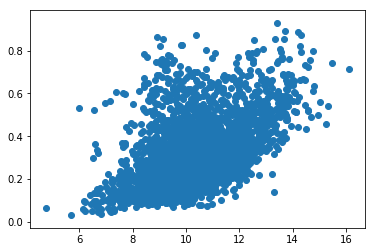

In [6]:
#how does percent democratic depend on log of population
a = plt.scatter(np.log(joined_2016.POPESTIMATE2016), joined_2016.perc_dem)
a

### 1.5

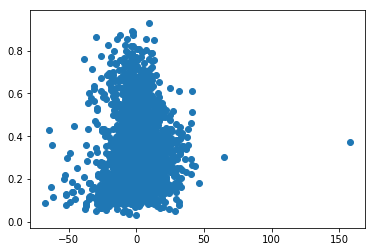

In [7]:
b = plt.scatter(joined_2016.RNETMIG2016, joined_2016.perc_dem)
b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


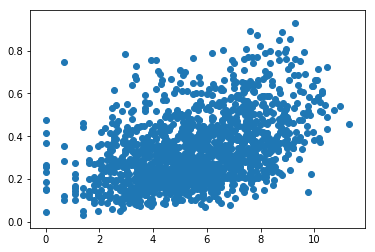

In [8]:
#this was an almost constant relationship before I ran it through log
c = plt.scatter(np.log(joined_2016.NPOPCHG_2016), joined_2016.perc_dem)
c

### 1.6

In [9]:
m = smf.ols(formula = 'perc_dem ~ POPESTIMATE2016', data = joined_2016, missing='drop').fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               perc_dem   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     433.4
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           3.16e-90
Time:                        14:50:12   Log-Likelihood:                 1623.6
No. Observations:                3111   AIC:                            -3243.
Df Residuals:                    3109   BIC:                            -3231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3002      0.003    111.269      0.000       0.295       0.305
POPESTIMATE2016  1.616e-07   7.76e-09     20.819      0.000    1.46e-07    1.77e-07
==============================================================================
Omnibus:                      386.661   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1018.479
Skew:                           0.689   Prob(JB):                    6.92e-222
Kurtosis:                       5.441   Cond. No.                     3.64e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


__the -0.0.3002 coefficient means that that is predicted percentage of people voting dem when the population is 0. Since a pop of zero means zero voters then this value is outside the relevant range of what we are modeling. The 1.616e-07 coefficient means that the predicted percentage of people voting dem increases by VERY small amounts with each population unit increase__


### 1.7

In [10]:
joined_2016['log_pop'] = joined_2016.POPESTIMATE2016.apply(lambda x: np.log(x))
m = smf.ols(formula = 'perc_dem ~ log_pop', data = joined_2016, missing='drop').fit()
m.summary()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               perc_dem   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     1040.
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          4.59e-197
Time:                        14:50:12   Log-Likelihood:                 1869.4
No. Observations:                3111   AIC:                            -3735.
Df Residuals:                    3109   BIC:                            -3723.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2165      0.017    -12.955      0.000      -0.249      -0.184
log_pop        0.0519      0.002     32.247      0.000       0.049       0.055
==============================================================================
Omnibus:                      621.986   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1196.532
Skew:                           1.209   Prob(JB):                    1.50e-260
Kurtosis:                       4.839   Cond. No.                         73.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


__the -0.21 coefficient means that that is predicted percentage of people voting dem when the log(pop) is 0. This is completely meaningless for a variety of reasons. The .051 coefficient means that the predicted percentage of people voting dem increases with each log(pop) unit increase by .051__


### 1.8

__I prefer the log of population model. I'm not exactly sure why to be honest, although I know that with population it is a commonly accepted practice. I think a log function distributes the concetrated nature of population, muuch like it does with pH. I think the bad reasons might be that the log model provides larger coefficients(or potentially decreased p values just not with this data). Additionally, some suplemental research on the internet suggests that a log function may be appropriate when the residuals have a skewed distribution.__

## 3

### 3.1

In [11]:
#input credit application data file
data = pd.read_csv('crx.data', names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6','A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16'])
#credit_apps.A2 = credit_apps.A2.astype(float)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [12]:
data.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

__the associated metadata claims that 37 rows have missing data in one or more columns, but does not state what form missing data is denoted with__

### 3.2

In [13]:
#creates a custom function convert the missing value denoter with NaN for later dropping
def not_num(x):
    if x == '?':
        r = np.nan
    else:
        r = x
    return r

#creates a custom function to replace + and - with 1 and 0 in A16
def as_num(x):
    if x == '+':
        r = 1
    else:
        r = 0
    return r


#applies the custom function to replace ? with NaN
data.A1 = data.A1.apply(lambda x : not_num(x))
data.A3 = data.A3.apply(lambda x : not_num(x))
data.A2 = data.A2.apply(lambda x : not_num(x)).dropna().astype(float) #converts to float
data.A4 = data.A4.apply(lambda x : not_num(x))
data.A5 = data.A5.apply(lambda x : not_num(x))
data.A6 = data.A6.apply(lambda x : not_num(x))
data.A7 = data.A7.apply(lambda x : not_num(x))
data.A8 = data.A8.apply(lambda x : not_num(x))
data.A9 = data.A9.apply(lambda x : not_num(x))
data.A10 = data.A10.apply(lambda x : not_num(x))
data.A11 = data.A11.apply(lambda x : not_num(x))
data.A12 = data.A12.apply(lambda x : not_num(x))
data.A13 = data.A13.apply(lambda x : not_num(x))
data.A14 = data.A14.apply(lambda x : not_num(x)).dropna().astype(int) #converts to int
data.A15 = data.A15.apply(lambda x : not_num(x))
data.A16 = data.A16.apply(lambda x : not_num(x)).apply(lambda x : as_num(x)).astype(int) #converts to 1 and 0, then int


#drops NAN data
data = data.dropna() 

### 3.3

In [14]:
data.describe()

,A2,A3,A8,A11,A14,A15,A16
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,31.503813,4.829533,2.244296,2.502297,180.359877,1013.761103,0.453292
std,11.838267,5.027077,3.371120,4.968497,168.296811,5253.278504,0.498195
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,73.000000,0.000000,0.000000
50%,28.420000,2.835000,1.000000,0.000000,160.000000,5.000000,0.000000
75%,38.250000,7.500000,2.625000,3.000000,272.000000,400.000000,1.000000
max,76.750000,28.000000,28.500000,67.000000,2000.000000,100000.000000,1.000000


#### Taken from the documentation

7.  Attribute Information:

    A1:	b, a.
    
    A4:	u, y, l, t.
    
    A5:	g, p, gg.
    
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    
    A7:	v, h, bb, j, n, z, dd, ff, o.
    
    A9:	t, f.
    
    A10: t, f.
    
    A12: t, f.
    
    A13: g, p, s.
    
    A16: +,-         (class attribute)

### 3.4

In [15]:
train, test = train_test_split(data, test_size=0.2)

### 3.5

In [16]:
#start the OLS model with an arbitrary constant
bench = smf.ols(formula = 'A16 ~ 1', data=train).fit()

bench.summary()

D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1554: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    A16   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Mon, 09 Dec 2019   Prob (F-statistic):                nan
Time:                        14:50:12   Log-Likelihood:                -376.26
No. Observations:                 522   AIC:                             754.5
Df Residuals:                     521   BIC:                             758.8
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4502      0.022     20.654      0.000       0.407       0.493
==============================================================================
Omnibus:                     2204.156   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.035
Skew:                           0.200   Prob(JB):                     1.26e-19
Kurtosis:                       1.040   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#predicts using benchmark model
yhat = bench.predict(test) > .5

#constructs crosstabulation
tab = pd.crosstab(test.A16, yhat)
    
#accurate predictions out of total possible predictions
bench_acc = (tab[0][0]) / tab.sum().sum()

In [18]:
#arbitrarily choose the first three variables to start with
m = smf.ols(formula = 'A16 ~ A1 + A2 + A3', data=train).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    A16   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     13.18
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           2.65e-08
Time:                        14:50:12   Log-Likelihood:                -357.06
No. Observations:                 522   AIC:                             722.1
Df Residuals:                     518   BIC:                             739.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1424      0.068      2.109      0.035       0.010       0.275
A1[T.b]        0.0029      0.046      0.064      0.949      -0.087       0.093
A2             0.0070      0.002      3.793      0.000       0.003       0.011
A3             0.0180      0.004      4.160      0.000       0.010       0.027
==============================================================================
Omnibus:                     2841.394   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.491
Skew:                           0.217   Prob(JB):                     3.64e-15
Kurtosis:                       1.306   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3.6

In [19]:
#custom function that calculates the accuracy of a passed model
def accuracy(model):
    #predicts with test data, converts to boolean with .5
    yhat = model.predict(test) > .5
    
    #constructs crosstabulation
    tab = pd.crosstab(test.A16, yhat)
    
    #accurate predictions out of total possible predictions
    r = (tab[0][0] + tab[1][1] ) / tab.sum().sum()
    
    return(r)

In [20]:
#OLS with 'A16 ~ A1 + A2 + A3'
accuracy(m)

0.5801526717557252

### 3.7

In [21]:
#arbitrarily choose the first three variables to start with
m = smf.logit(formula = 'A16 ~ A1 + A2 + A3', data=train).fit()
m.summary()

Optimization terminated successfully.
         Current function value: 0.651032
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    A16   No. Observations:                  522
Model:                          Logit   Df Residuals:                      518
Method:                           MLE   Df Model:                            3
Date:                Mon, 09 Dec 2019   Pseudo R-squ.:                 0.05398
Time:                        14:50:12   Log-Likelihood:                -339.84
converged:                       True   LL-Null:                       -359.23
                                        LLR p-value:                 1.933e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5749      0.309     -5.089      0.000      -2.182      -0.968
A1[T.b]        0.0188      0.198      0.095      0.924      -0.369       0.407
A2             0.0311      0.008      3.751      0.000       0.015       0.047
A3             0.0817      0.020      4.055      0.000       0.042       0.121
==============================================================================
"""

In [22]:
#Logit with 'A16 ~ A1 + A2 + A3'
accuracy(m)

0.5954198473282443

### 3.8

In [23]:
#Adding only columns that increase the prediction accuracy above the benchmark I arrive at the following OLS model
m = smf.ols(formula = 'A16 ~ A3 + A6 + A8 + A9', data=train).fit()

#compares to benchmark accuracy
accuracy(m) - bench_acc

0.33587786259541985

In [24]:
#Percentage correct with 'best' OLS model(A16 ~ A3 + A6 + A8 + A9)
accuracy(m) 

0.8702290076335878

__Repeat process with Logistic to find the best inputs__

In [25]:
#benchmarking with arbitrary constant
logit_bench = smf.logit(formula = 'A16 ~ 1', data = train).fit()

#predicts using benchmark model
yhat = logit_bench.predict(test) > .5

#constructs crosstabulation
tab = pd.crosstab(test.A16, yhat)
    
#benchmarked accurate predictions out of total possible predictions
l_bench_acc = (tab[0][0]) / tab.sum().sum()

Optimization terminated successfully.
         Current function value: 0.688177
         Iterations 4


In [26]:
m2 = smf.logit(formula = 'A16 ~ A3 + A4 + A6 + A7 + A9 + A10 + A11', data=train).fit()
#compares to benchmark accuracy
accuracy(m2) - l_bench_acc

         Current function value: 0.290675
         Iterations: 35


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0.33587786259541985

In [27]:
#Percentage correct with 'best' Logistic model('A16 ~ A3 + A4 + A6 + A7 + A9 + A10 + A11')
accuracy(m2) 

0.8702290076335878

### 3.9


__The best model in terms of the percentage correct predictions was the below logistic regression model. However, along the way to finding it there were a variety of different errors I didnt know how to evaluate, so I rejected the model that created them. This may be probematic and represents a hole in my knowledge.__

In [28]:
m2 = smf.logit(formula = 'A16 ~ A3 + A4 + A6 + A7 + A9 + A10 + A11', data=train).fit()

         Current function value: 0.290675
         Iterations: 35


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
